<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%EA%B3%A0%EC%A0%84%EC%97%AD%ED%95%99_005_Fowles_AM_2_5_Vertical_Fall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 고전역학

# 2.4 유체 속의 수직 낙하

In [ ]:
import sympy as sym

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

독립 변수 t 및 각종 상수를 기호 식으로 정의:

In [ ]:
sym.init_printing()

In [ ]:
t, T, c1, c2, m, g, v0, vt = sym.symbols(r"t T c_1 c_2 m g v_0 v_t", positive=True)

In [ ]:
t, T, c1, c2, m, g, v0, vt

(t, T, c₁, c₂, m, g, v₀, vₜ)

v의 t에 대한 미분을 정의하기 위해 v는 t의 함수로 정의해 준다.

In [ ]:
v = sym.symbols('v', cls=sym.Function)
v = v(t)
v

v(t)

## (a) 선형 저항의 경우:

미분 방정식

$$ m\frac{dv}{dt}= - m g - c_1 v$$

로부터

$$ \frac{dv}{dt}= - g - \frac{c_1}{m} v$$


In [ ]:
dvdt = -g - c1/m * v
dvdt

  c₁⋅v(t)    
- ─────── - g
     m       

변수 분리를 통해

$$ dt = -\frac{dv}{g + \frac{c_1}{m}v}$$

를 얻고, 양 변을 각각 적분하면

$$ t = -\int_{v_0}^{v} \frac{dv}{g + \frac{c_1}{m}v} = -\frac{m}{c_1}\ln\frac{mg + c_1 v}{mg + c_1 v_0}$$

위에서 우변을 적분하기 위해

$$s \equiv 1 + \frac{c_1}{mg}v$$

라고 치환하면

$$dv = \frac{mg}{c_1}ds$$

$$ \begin{align} t &= -\int_{v_0}^{v} \frac{dv}{g\left(1+\frac{c_1}{mg}v\right)} \\
&= - \frac{m}{c_1}\int_{s_0}^{s}\frac{ds}{s}\\
&= - \frac{m}{c_1} \biggl. \ln s \biggr|_{s_0}^{s}\\
&= - \frac{m}{c_1} \ln\frac{s}{s_0} = - \frac{m}{c_1}\ln\frac{mg + c_1 v}{mg + c_1 v_0}
\end{align}$$

In [ ]:
# t에 대한 식은 기호 t 와는 구별하기 위해 texp로 써준다. ('exp' for 'expression')

texp = sym.integrate(1/dvdt, (v, v0, v))
texp

m⋅log(c₁⋅v₀ + g⋅m)   m⋅log(c₁⋅v(t) + g⋅m)
────────────────── - ────────────────────
        c₁                    c₁         

In [ ]:
# t = texp 를 v에 대하여 풀어 v의 식을 얻는다
vsol = sym.solve(texp - t, v)
vsol[0]

        -c₁⋅t + m⋅log(c₁⋅v₀ + g⋅m)
        ──────────────────────────
                    m             
-g⋅m + ℯ                          
──────────────────────────────────
                c₁                

In [ ]:
# v의 식을 전개하여 정리하여 준다.

vexp = sym.expand(vsol[0])
vexp

                        -c₁⋅t 
    -c₁⋅t               ──────
    ──────                m   
      m      g⋅m   g⋅m⋅ℯ      
v₀⋅ℯ       - ─── + ───────────
             c₁        c₁     

* sympy.dsolve 를 이용하는 경우:

In [ ]:
# 't' for 'function of t'
vt = sym.Function('v')
vt

v

In [ ]:
# Symbolic solution for vt
vtsol = sym.dsolve(sym.Derivative(vt(t), t) + g + c1/m * vt(t), vt(t), ics={vt(0): v0})
vtsol

                              -c₁⋅t 
                              ──────
                                m   
         g⋅m   (c₁⋅v₀ + g⋅m)⋅ℯ      
v(t) = - ─── + ─────────────────────
         c₁             c₁          

In [ ]:
# t --> ∞ 일 때 v(t) 의 극한

sym.limit(vtsol.rhs, t, sym.oo)

-g⋅m 
─────
 c₁  

In [ ]:
# 종단 속도/종단 속력:
# 물체의 속력이 빨라지면 이에 따라 공기 저항 커진다.
# 공기 저항의 크기가 중력과 같아지면 힘의 평형이 이루어져 물체는 등속도 운동을 한다.
# 이 때의 속도를 종단 속도라 하고 종단 속도의 크기를 종단 속력이라 한다.

# 'term' for 'terminal'

vterm = -sym.limit(vexp, t, sym.oo)
vterm

g⋅m
───
c₁ 

환산 시간 $T$를 $$T = \frac{c_1}{m}t$$
로 정의하고, 종단 속도는 힘의 평형 조건 $ c_1 v_t = m g$로부터

$$v_t = \frac{mg}{c_1}$$

이고,
$v_0 = 0$인 경우에

$$v(t) = -\frac{mg}{c_1}(1-e^{-T}) = -v_t(1-e^{-T})$$
이므로, 환산 속력을 $$u\equiv \frac{\left|v(t)\right|}{v_t} $$로 정의하면
$$u = 1-e^{-T}$$이다.

여기서 정지상태로부터 중력 가속도로 공기 저항 없이 가속하여 종단 속력에 도달하는 시간을 **특성 시간**이라 하며, 특성 시간 $\tau$는  $g\tau = v_t $에서

$$ \tau = \frac{v_t}{g} = \frac{m}{c_1} $$

으로 주어진다.

In [ ]:
# 초기 속도 v0 --> 0,
# 시간은 T = t / (m1/c) 인 관계를 이용하여
# 특성 시간(tau)의 배수로 표현: t = T * (m/c1)

# 'red' for 'reduced'
vred = vexp.subs({v0:0, t:T*m/c1}) / vterm
uL = -sym.expand(vred)
uL

     -T
1 - ℯ  

In [ ]:
vred

   ⎛             -T⎞
   ⎜  g⋅m   g⋅m⋅ℯ  ⎟
c₁⋅⎜- ─── + ───────⎟
   ⎝  c₁      c₁   ⎠
────────────────────
        g⋅m         

## (b) 제곱형 저항의 경우:

제곱형 저항, 즉 속력의 제곱에 비례하는 저항을 받으며 낙하하는 물체의 경우 아래쪽을 양의 방향으로 정하면,

$$ \begin{align}
m\frac{dv}{dt} &= m g - c_2 v^2 \\
&= m g \left( 1 - \frac{c_2}{mg} v^2 \right) \\
\frac{dv}{dt}&= g \left( 1 - \frac{v^2}{v_t^2} \right)
\end{align}
$$

여기서 $$v_t=\sqrt\frac{mg}{c_2}$$는 종단 속력이다.


환산 속도 $ u \equiv v/v_t $ 및 환산 시간  $T = t/\tau$를 정의하면 (여기서 특성 시간 $\tau = v_t/g = \sqrt{m/c_2 g}$ ),

$$ \frac{dv}{dt} = \frac{v_t}{\tau}\frac{du_Q}{dT} = g\frac{du}{dT} = g\left(1-u^2 \right)$$

이므로

$$ \frac{du}{dT} = 1-u^2 $$

로 쓸 수 있다.

$$dT = \frac{du}{1-{u^2}}$$

$$ T - T_0 = \int_{u_0}^{u} \frac{du}{1 - u^2}$$

$$u = \tanh(aT)$$

라고 치환하면

$$du = \frac{a}{\cosh^2(aT)}dT, $$

$$1-u^2 = \frac{1}{\cosh^2(aT)}$$이므로,

$$ T - T_0 = \int_{T_0}^{T} a dT,$$
따라서

$$a = 1$$

이고,

$$ u = \tanh T$$

이다.

이것을 본래의 $v$, $t$ 등으로 표현하면,

$$t = \tau\tanh^{-1}\left( \frac{v}{v_t} \right)$$ 에서
 $$ t - t_0  = \tau\left( \tanh^{-1} \frac{v}{v_t} - \tanh^{-1} \frac{v_0}{v_t} \right),$$

 $$ \tanh^{-1} \frac{v}{v_t} = \frac{t - t_0}{\tau} + \tanh^{-1} \frac{v_0}{v_t},$$

 $$ v = v_t\tanh\left( \frac{t - t_0}{\tau} + \tanh^{-1} \frac{v_0}{v_t}  \right). $$

처음 $t_0=0$ 일 때 정지 상태($v_0=0$)에서 물체를 떨어뜨렸다면,

$$ v = v_t \tanh\frac{t}{\tau} = v_t \frac{e^{t/\tau} - e^{-t/\tau}}{e^{t/\tau} + e^{-t/\tau}} = v_t \frac{e^{2t/\tau} - 1}{e^{2t/\tau} + 1}.$$

라고 쓸 수 있다.



다음 두 식을 나란히 플로팅하여 비교해 보면 각각의 특성 시간을 기준으로 각각의 종단속도에 어느 쪽이 더 빨리 수렴하는지 비교해 볼 수 있다.
$$u_{L} = 1 - e^{-T}$$
$$u_{Q} = \tanh T$$

* $L$ for 'linear'
* $Q$ for 'quadratic'

In [ ]:
c2, t0 = sym.symbols(r"c_2 t_0")

In [ ]:
# 종단 속도
# 't' for 'terminal', 'q' for 'quadratic'
vtq = sym.sqrt(m*g/c2)
vtq

          ____
         ╱ 1  
√g⋅√m⋅  ╱  ── 
      ╲╱   c₂ 

In [ ]:
# sym.dsolve를 이용하여 위 적분을 확인해 본다 (t0 = 0 일 때 v0 = 0인 경우)
tsolq = sym.integrate(1/(g*(1-v**2/vtq**2)), (v, v0, v))
tsolq.subs(v0,0)

  ⎛    ____    ⎛           ____⎞       ____    ⎛          ____⎞⎞     ⎛    ____ ↪
  ⎜   ╱ 1      ⎜          ╱ 1  ⎟      ╱ 1      ⎜         ╱ 1  ⎟⎟     ⎜   ╱ 1   ↪
  ⎜  ╱  ── ⋅log⎜-√g⋅√m⋅  ╱  ── ⎟     ╱  ── ⋅log⎜√g⋅√m⋅  ╱  ── ⎟⎟     ⎜  ╱  ──  ↪
  ⎜╲╱   c₂     ⎝       ╲╱   c₂ ⎠   ╲╱   c₂     ⎝      ╲╱   c₂ ⎠⎟     ⎜╲╱   c₂  ↪
m⋅⎜───────────────────────────── - ────────────────────────────⎟ - m⋅⎜──────── ↪
  ⎝           2⋅√g⋅√m                        2⋅√g⋅√m           ⎠     ⎝         ↪

↪     ⎛            ____       ⎞       ____    ⎛          ____       ⎞⎞
↪     ⎜           ╱ 1         ⎟      ╱ 1      ⎜         ╱ 1         ⎟⎟
↪ ⋅log⎜- √g⋅√m⋅  ╱  ──  + v(t)⎟     ╱  ── ⋅log⎜√g⋅√m⋅  ╱  ──  + v(t)⎟⎟
↪     ⎝        ╲╱   c₂        ⎠   ╲╱   c₂     ⎝      ╲╱   c₂        ⎠⎟
↪ ───────────────────────────── - ───────────────────────────────────⎟
↪        2⋅√g⋅√m                                2⋅√g⋅√m              ⎠

In [ ]:
# 아래 식에서 v_t 와 τ에 해당되는 식을 알아볼 수 있는가?

vtsolq = sym.solve(sym.exp(tsolq.subs(v0,0))-sym.exp(t), v)
vtsolq[0]

          ____                  
         ╱ 1       ⎛   √g⋅t    ⎞
√g⋅√m⋅  ╱  ── ⋅tanh⎜───────────⎟
      ╲╱   c₂      ⎜       ____⎟
                   ⎜      ╱ 1  ⎟
                   ⎜√m⋅  ╱  ── ⎟
                   ⎝   ╲╱   c₂ ⎠

In [ ]:
"""
해석적인 방법으로 구한 정확한 공식
T: 시간축 (t/tau)
ulin: 선형 저항을 받는 경우의 속도(v/vt)
uquad: 제곱형 저항을 받는 경우의 속도 (v/vt)
"""
T = np.linspace(0,4.0,101)
ulin = 1 - np.exp(-T)  # 'lin' for Linear drag
uquad = np.tanh(T)     # 'quad' for Quadratic drag

In [ ]:
len(ulin)

101

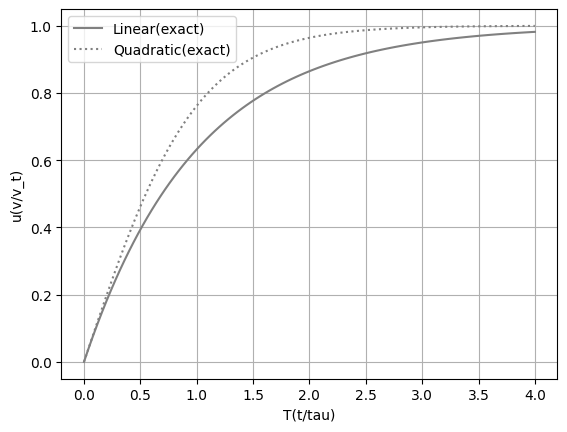

In [ ]:
"""
정규화한 속도-시간 그래프를 그려 비교한다.
(vt 값이 선형 저항의 경우와 제곱형 저항의의 경우가 같지 않음에 유의)
"""
plt.plot(T, ulin, c="gray", ls="solid", label="Linear(exact)")
plt.plot(T, uquad, c="gray", ls="dotted", label="Quadratic(exact)")
plt.xlabel("T(t/tau)")
plt.ylabel("u(v/v_t)")
plt.grid()
plt.legend()

# 2.5 유체 속의 수직 낙하: 수치적 해법

In [ ]:
"""
수치 시뮬레이션을 위해
선형 및 제곱형 저항력의 경우 각각에 대하여
주어진 속도 값에 따라 가속도 값을 반환하는 함수들을 정의한다.
"""

# Linear Resistsance
def linear(t, y):
  u = y           # u = v/vt
  dudt = 1 - u

  return dudt

# Quadratic Resistance
def quadratic(t, y):
  u = y
  dudt = 1 - u**2

  return dudt

In [ ]:
def rk4step(f, t, y, h):
  k1 = f(t, y)
  k2 = f(t + h/2, y + h/2 * k1)
  k3 = f(t + h/2, y + h/2 * k2)
  k4 = f(t + h,   y + h * k3)
  y = y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
  return y

In [ ]:
class ivsol():
  def __init__(self):
    self.t = np.array([])
    self.y = np.array([])

def rkfixed(y0, t0, tf, npoints, D):
  """
  2.5절에 소개된 Mathcad의 rkfixed와 같은 방식으로 입력 변수를 받아 풀이 값을 반환하는 함수
  단, x->t 등과 같이 독립 변수 이름만 변경함.
  """
  t = t0
  y = y0
  h = (tf-t0)/npoints

  sols = ivsol()
  sols.t = np.array([t0])
  sols.y = np.array([y0])

  while t < tf:
    y = rk4step(D, t, y, h)
    t = t + h
    sols.t = np.append(sols.t, t)
    sols.y = np.append(sols.y, y)

  return sols

In [ ]:
"""
시작 시간(t0), 초기 속도(u0), 시뮬레이션 종료 시각(tb), 시뮬레이션 시간 간격(dt) 등
초기값을 정한다.
"""
t0 = 0   # starting time = 0
u0 = 0   # initial velocity = 0: free fall
tf = 4.0           # simulation time limit
N = 100
dt = (tf - t0) / N

"""
선형 저항:
"""
linsol = rkfixed(u0, t0, tf, N, linear)

"""
제곱형 저항:
"""
quadsol = rkfixed(u0, t0, tf, N, quadratic)

In [ ]:
len(linsol.t)

101

In [ ]:
tl = linsol.t
ul = linsol.y

tq = quadsol.t
uq = quadsol.y


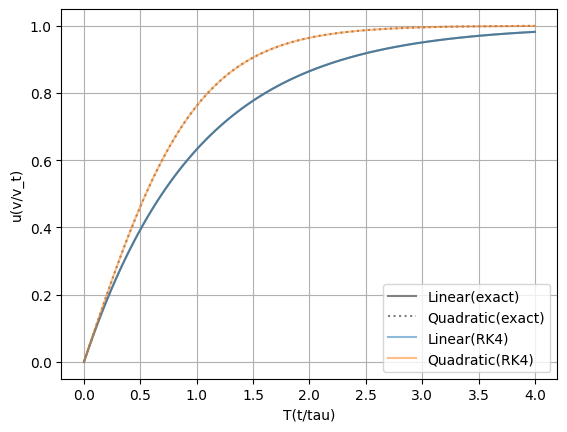

In [ ]:
"""
시뮬레이션 결과를 그래프로 그려 본다.
정규화된 속도-시간 그래프:
"""
plt.plot(T, ulin, c="gray", ls="solid", label="Linear(exact)")
plt.plot(T, uquad, c="gray", ls="dotted", label="Quadratic(exact)")
plt.plot(tl, ul, alpha=0.5, label="Linear(RK4)")
plt.plot(tq, uq, alpha=0.5, label="Quadratic(RK4)")
plt.grid()
plt.xlabel("T(t/tau)")
plt.ylabel("u(v/v_t)")
plt.legend()

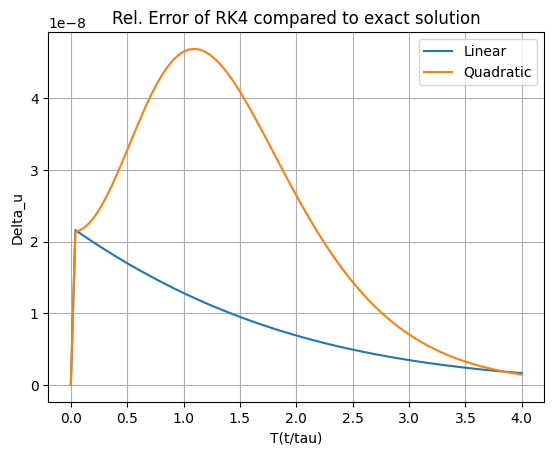

In [ ]:
"""
정확한 공식에 따른 결과와 비교
"""
ulin = 1 - np.exp(-tl)
uquad = np.tanh(tq)

"""
정확한 계산값에 대한 시뮬레이션 결과의 상대 오차를
선형 저항과 제곱형 저항에 대하여 각각 계산하여 그래프로 그려본다.
"""
DeltaL = np.abs(ul - ulin)
DeltaL[ulin > 0] /= ulin[ulin > 0] # ulin이 0이 아닌 원소에 대해서만 ulin으로 나눈다.
DeltaQ = np.abs(uq - uquad)
DeltaQ[uquad > 0] /= uquad[uquad > 0] # uquad가 0이 아닌 원소에 대해서만 uquad로 나눈다.

plt.title("Rel. Error of RK4 compared to exact solution")
plt.plot(tl, DeltaL, label="Linear")
plt.plot(tq, DeltaQ, label="Quadratic")
plt.grid()
plt.xlabel("T(t/tau)")
plt.ylabel("Delta_u")
plt.legend()
plt.show()

## 참고: 기울기 장(slope field)

미분 방정식
$$ \frac{du_Q}{dt} = 1- u_Q^2 $$
을 $t$, $u$를 각각 가로축과 세로축으로 하는 좌표에 시각적으로 나타내 본다. 이 때 $du/dt$는 좌표 $(t, u)$ 위에 기울기를 나타내는 짧은 선분으로 나타낸다.


In [ ]:
tcoords = np.linspace(0, 4, 20+1)
uQcoords = np.linspace(0, 2, 20+1)
tt, uQ  = np.meshgrid(tcoords, uQcoords)

def duQdt(t, u):
  return 1 - u**2

In [ ]:
tt.shape, uQ.shape

((21, 21), (21, 21))

In [ ]:
duQdts = duQdt(tt, uQ)

In [ ]:
duQdts.shape

(21, 21)

In [ ]:
I = np.ones_like(tt)

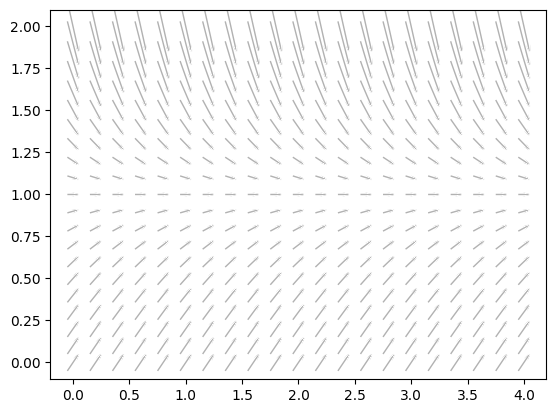

In [ ]:
# 기울기 장을 짧은 선분들로 그린다
plt.quiver(tt, uQ, I, duQdts, \
           scale_units='xy', angles='xy', scale=10, alpha=0.3,\
           pivot='mid', headaxislength=0)

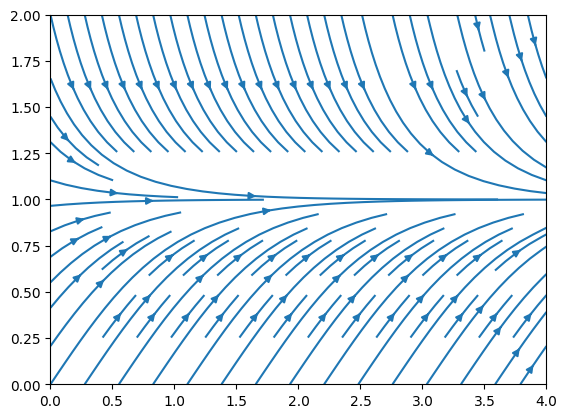

In [ ]:
# 기울기 장을 따라가는 곡선들의 흐름도
plt.streamplot(tt, uQ, I, duQdts)

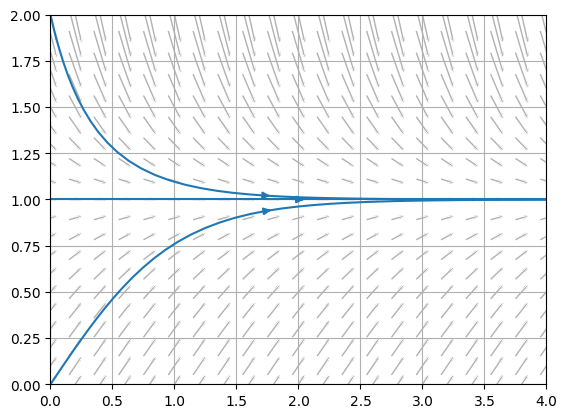

In [ ]:
plt.grid()

# 기울기 장
plt.quiver(tt, uQ, I, duQdts, \
           scale_units='xy', angles='xy', scale=10, alpha=0.3,\
           pivot='mid', headaxislength=0)

# (t, u) = (0,0), (0,1), (0,2)인 점에서 출발하여 이 기울기 장을 따라가는 연속적인 곡선들을 그린다.
plt.streamplot(tt, uQ, I, duQdts, \
               broken_streamlines=False, \
               start_points=[[0,0], [0,1], [0,2]])

선형 저항을 받으며 낙하하는 물체의 운동방정식(아래쪽을 양의 방향으로 함)

$$ \frac{du_L}{dt} = 1 - u_L $$

In [ ]:
tcoords = np.linspace(0, 4, 20+1)
uLcoords = np.linspace(0, 2, 20+1)
tt, uL  = np.meshgrid(tcoords, uLcoords)

def duLdt(t, u):
  return 1 - u

In [ ]:
tt.shape, uL.shape

((21, 21), (21, 21))

In [ ]:
duLdts = duLdt(tt, uL)

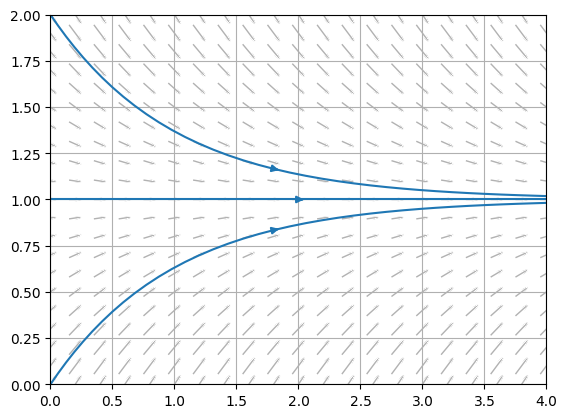

In [ ]:
plt.grid()

# 기울기 장
plt.quiver(tt, uL, I, duLdts, \
           scale_units='xy', angles='xy', scale=10, alpha=0.3,\
           pivot='mid', headaxislength=0)

# 기울기 장을 따라가는 곡선들
plt.streamplot(tt, uL, I, duLdts, broken_streamlines=False, start_points=[[0,0], [0,1], [0,2]])

In [ ]:
import matplotlib.lines as mlines

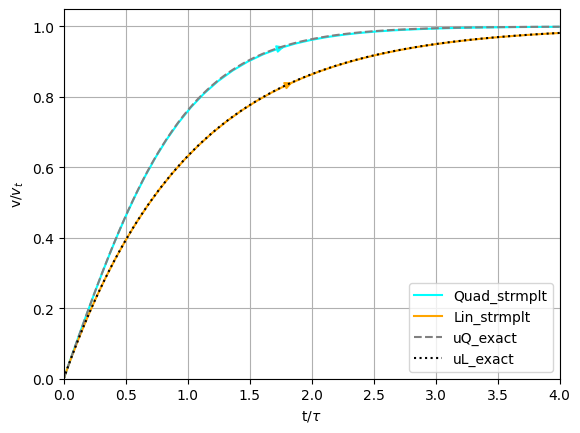

In [ ]:
quad_color = "cyan"
lin_color = "orange"
plt.grid()
plt.xlabel(r"t/$\tau$")
plt.ylabel("v/$v_t$")
# Streamplot은 주어진 격자점에서의 기울기만으로 근사한 것이므로 완벽하지는 않다는 점에 유의할 것.
# 단, 격자점이 충분히 촘촘하면 정확한 값에 가까운 곡선을 얻을 수 있다.
plt.streamplot(tt, uQ, I, duQdts, \
               broken_streamlines=False, start_points=[[0,0]], color=quad_color)

plt.streamplot(tt, uL, I, duLdts, \
               broken_streamlines=False, start_points=[[0,0]], color=lin_color)

# Streamplot은 legend를 위한 label을 지원하지 않으므로
# legend를 위한 허수아비 그래프를 만든다:
quad_line = mlines.Line2D([], [], color=quad_color, marker=None,
                          markersize=15, label='Quad_strmplt')
lin_line = mlines.Line2D([], [], color=lin_color, marker=None,
                          markersize=15, label='Lin_strmplt')

# 정확한 풀이와 비교:
uquad_line, = plt.plot(T, uquad, c="gray", ls="dashed", label="uQ_exact")
ulin_line, = plt.plot(T, ulin, c="k", ls="dotted", label="uL_exact")

plt.legend(handles=[quad_line, lin_line, uquad_line, ulin_line], loc='lower right')